In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import torch
import torch.nn as nn
import torch.nn.functional as F
from gpytorch.kernels import RBFKernel, ScaleKernel

import matplotlib.pyplot as plt

/home/patel_zeel/miniconda3/envs/torch_gpu_py311/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/home/patel_zeel/miniconda3/envs/torch_gpu_py311/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(


torch.Size([100, 2])

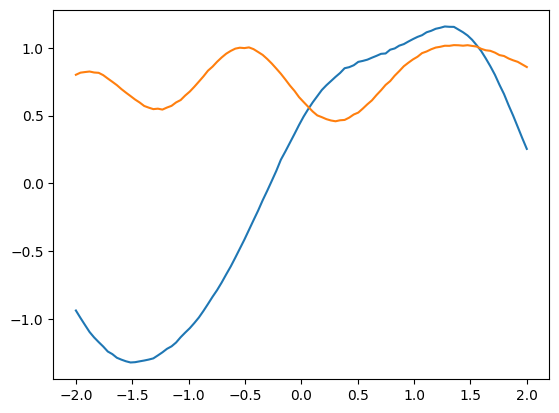

In [2]:
k = ScaleKernel(RBFKernel())
N = 100
x = torch.linspace(-2, 2, N)
with torch.no_grad():
    K = k(x.unsqueeze(1), x.unsqueeze(1))
K.diagonal().add_(1e-6)

torch.manual_seed(0)
chol = K.cholesky()
sample1 = chol @ torch.randn(N, 1)
sample2 = chol @ torch.randn(N, 1)
plt.plot(x, sample1, label='sample1')
plt.plot(x, sample2, label='sample2')

inp = torch.cat([sample1, sample2], dim=1)
inp.shape

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        # x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [7]:
mul = sample1 * sample2

model = SimpleNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(inp)
    loss = F.mse_loss(output, mul)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

Epoch 0/2000, Loss: 1.3764337301254272
Epoch 100/2000, Loss: 0.1411294788122177
Epoch 200/2000, Loss: 0.025695139542222023
Epoch 300/2000, Loss: 0.022308045998215675
Epoch 400/2000, Loss: 0.02187155932188034
Epoch 500/2000, Loss: 0.02167421393096447
Epoch 600/2000, Loss: 0.021597208455204964
Epoch 700/2000, Loss: 0.02157161757349968
Epoch 800/2000, Loss: 0.02156434766948223
Epoch 900/2000, Loss: 0.02156258188188076
Epoch 1000/2000, Loss: 0.021562213078141212
Epoch 1100/2000, Loss: 0.02156214974820614
Epoch 1200/2000, Loss: 0.021562136709690094
Epoch 1300/2000, Loss: 0.021562134847044945
Epoch 1400/2000, Loss: 0.021562136709690094
Epoch 1500/2000, Loss: 0.021562140434980392
Epoch 1600/2000, Loss: 0.021562136709690094
Epoch 1700/2000, Loss: 0.021562140434980392
Epoch 1800/2000, Loss: 0.021562136709690094
Epoch 1900/2000, Loss: 0.021562136709690094


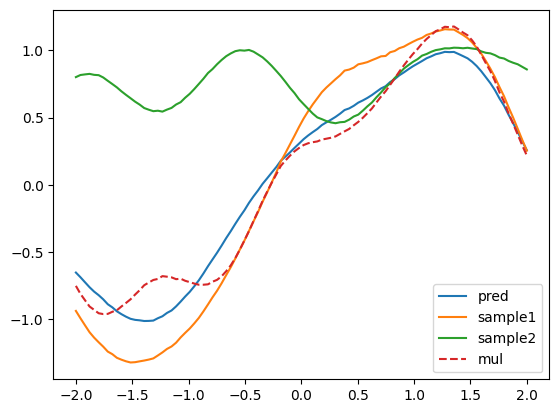

In [8]:
with torch.no_grad():
    output = model(inp)
    plt.plot(x, output, label='pred')

plt.plot(x, sample1, label='sample1')
plt.plot(x, sample2, label='sample2')
plt.plot(x, mul, label='mul', linestyle='--')

plt.legend()

In [9]:
dict(model.named_parameters())

{'fc2.weight': Parameter containing:
 tensor([[0.7454, 0.3708]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([-0.2504], requires_grad=True)}